#### Calculations statistics of element distribution by the holes, with normalized sqlite database.

In [50]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt  
import os 
import re

#Scott Halley's geochemistry data in geo3.db file
ls_db_file_name = 'geo3.db' 
#what type of the data you want to use, all or labeled
ls_labeled = 'labeled' 
#create empty dataframe
df = pd.DataFrame(None)
#create database connection
connect_db = sqlite3.connect(ls_db_file_name)
#lest get a elements_list from table 'elements'
ls_sql0 = "select name from elements"
cur = connect_db.cursor()
cur.execute(ls_sql0)
elements_list = cur.fetchall() # list of elements in elements_list

In [54]:
#Function f_plot_drill_scatter creates jpg scatter diagrams one of 3 types S(D), K(D), S(K)
"""
arguments:
as_element_name - string value like "Ag"
as_labeled   - string value in set one of 2 variants "all", "labeled" - if labeled then only data with exclusion_ref=0
as_type - string value in set one of 3 variants "S(D)", "K(D)", "S(K)" 
as_sub_folder - subfolder in your python catalog with jpg scattergrams
connect_db - database connection object
f_plot_drill_scatter(ls_tmp_element_name,'E(A)',connect_db)
"""
def f_plot_drill_scatter(as_element_name,as_labeled,as_type, as_sub_folder, connect_db):   
    #clear local variables
    ls_tmp_element_name = as_element_name
    ls_main=''
    ls_labeled=''
    ls_tmp_color=''
    df = pd.DataFrame(None)
    print(ls_tmp_element_name)
    # adds "main" word to diagram title for main elements  
    if ls_tmp_element_name in ['Al','Ca','Fe','K','Mg','Na','S','Ti','SiO2']:
        ls_main='main '
    if as_labeled =='labeled':
        ls_labeled="t2.description like '%-0' and" 
    else: 
        ls_labeled="t2.description not like '%-0' and" 
    # assemble sql query into ls_sql1 to extract data for element distribution by holes 
    ls_sql1 = "select t1.* ,t2.description as desc,t2.mark as mark "+ \
            "from distrib_properties t1 ,assumptions  t2 "+ \
            "where "+ls_labeled+" t1.assumption_ref = t2.id and t1.element_ref in  "+ \
             " (select t2.id from elements t2 where t2.name= '"+ ls_tmp_element_name+"')"
    # print (ls_sql1)
    # execute ls_Sql to dataframe df
    query = connect_db.execute(ls_sql1)
    cols = [column[0] for column in query.description]
    df = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
    # preparing diagram titles and axis names
    plt.clf()
    if as_type == 'S(D)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' Skewness vs Standard deviation'
        ls_x_label = 'Standard deviation'  
        ls_y_label = 'Skewness'
        ls_file_name2='-0-S(SD)'
    elif as_type == 'K(D)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' Kurtosis vs Standard deviation'
        ls_x_label = 'Standard deviation'
        ls_y_label = 'Kurtosis'     
        ls_file_name2='-1-K(SD)'      
    elif as_type == 'K(S)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' Kurtosis vs Skewness'
        ls_x_label = 'Skewness'
        ls_y_label = 'Kurtosis'
        ls_file_name2='-2-K(S)'         
    else:#if as_type not in S(D),K(D),S(K) then do nothing and exit
        return 
    # plotting a scatter diagram    

    fig = plt.figure(figsize=(10,5))
    plt.title(ls_chart_name) 
    print (ls_chart_name+ls_tmp_element_name)
    plt.xlabel(ls_x_label)
    plt.ylabel(ls_y_label)
    #plt.axis([-1, 10, -1, 5])
    for i in range(0,len(df)): 
            if as_type == 'S(D)':    
                plt.scatter(df['std_deviation'][i], df['skewness'][i],color = df['mark'][i]) #df['mark'][i]
                plt.text(df['std_deviation'][i], df['skewness'][i], df['desc'][i], horizontalalignment='left', size='small', color='black')
            elif as_type == 'K(D)': 
                plt.scatter(df['std_deviation'][i], df['kurtosis'][i],color = df['mark'][i]) #df['mark'][i]
                plt.text(df['std_deviation'][i], df['kurtosis'][i], df['desc'][i], horizontalalignment='left', size='small', color='black')
            elif as_type == 'K(S)':                
                plt.scatter(df['skewness'][i], df['kurtosis'][i],color = df['mark'][i]) #df['mark'][i]
                plt.text(df['skewness'][i], df['kurtosis'][i], df['desc'][i], horizontalalignment='left', size='small', color='black')
    # save diagram  to jpg file              
    plt.savefig(as_sub_folder+'/'+ls_tmp_element_name+ls_file_name2+'.jpg',bbox_inches='tight', dpi=150)


In [61]:
#specify subfolder where you want to create pictures
ls_sub_folder='pic1' #pictures with diagram will be uploaded to this subfolder
if not(os.path.isdir(ls_sub_folder)) :
    os.mkdir(ls_sub_folder)

0 ('Ag',) Ag
Ag
Ag Skewness vs Standard deviationAg
Ag
Ag Kurtosis vs Standard deviationAg
Ag
Ag Kurtosis vs SkewnessAg
1 ('Al',) Al
Al
main Al Skewness vs Standard deviationAl
Al
main Al Kurtosis vs Standard deviationAl
Al
main Al Kurtosis vs SkewnessAl
2 ('As',) As
As
As Skewness vs Standard deviationAs
As
As Kurtosis vs Standard deviationAs
As
As Kurtosis vs SkewnessAs
3 ('Ba',) Ba
Ba
Ba Skewness vs Standard deviationBa
Ba
Ba Kurtosis vs Standard deviationBa
Ba
Ba Kurtosis vs SkewnessBa
4 ('Be',) Be
Be
Be Skewness vs Standard deviationBe
Be
Be Kurtosis vs Standard deviationBe
Be
Be Kurtosis vs SkewnessBe
5 ('Bi',) Bi
Bi
Bi Skewness vs Standard deviationBi
Bi
Bi Kurtosis vs Standard deviationBi
Bi
Bi Kurtosis vs SkewnessBi
6 ('Ca',) Ca
Ca
main Ca Skewness vs Standard deviationCa
Ca
main Ca Kurtosis vs Standard deviationCa


C:\Users\b_malahov\AppData\Local\Temp\ipykernel_9432\2648845245.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,5))


Ca
main Ca Kurtosis vs SkewnessCa
7 ('Cd',) Cd
Cd
Cd Skewness vs Standard deviationCd
Cd
Cd Kurtosis vs Standard deviationCd
Cd
Cd Kurtosis vs SkewnessCd
8 ('Ce',) Ce
Ce
Ce Skewness vs Standard deviationCe
Ce
Ce Kurtosis vs Standard deviationCe
Ce
Ce Kurtosis vs SkewnessCe
9 ('Co',) Co
Co
Co Skewness vs Standard deviationCo
Co
Co Kurtosis vs Standard deviationCo
Co
Co Kurtosis vs SkewnessCo
10 ('Cr',) Cr
Cr
Cr Skewness vs Standard deviationCr
Cr
Cr Kurtosis vs Standard deviationCr
Cr
Cr Kurtosis vs SkewnessCr
11 ('Cs',) Cs
Cs
Cs Skewness vs Standard deviationCs
Cs
Cs Kurtosis vs Standard deviationCs
Cs
Cs Kurtosis vs SkewnessCs
12 ('Fe',) Fe
Fe
main Fe Skewness vs Standard deviationFe
Fe
main Fe Kurtosis vs Standard deviationFe
Fe
main Fe Kurtosis vs SkewnessFe
13 ('Ga',) Ga
Ga
Ga Skewness vs Standard deviationGa
Ga
Ga Kurtosis vs Standard deviationGa
Ga
Ga Kurtosis vs SkewnessGa
14 ('Ge',) Ge
Ge
Ge Skewness vs Standard deviationGe
Ge
Ge Kurtosis vs Standard deviationGe
Ge
Ge Kurtosis 

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

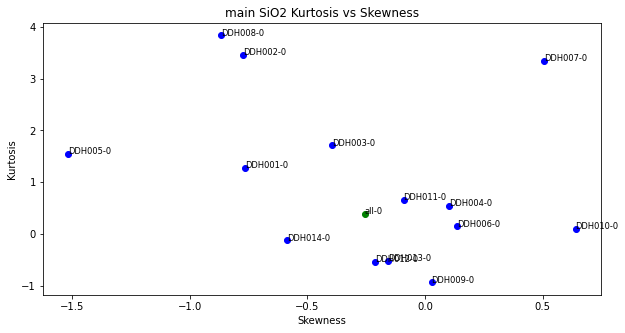

In [62]:
#generate 144 diagrams in pic folder ls_sub_folder
for i in range(0, len(elements_list)):
#for i in range(20, 2):    
    #this regexp clears elements_list from extra characters
    reg = re.compile('[^a-zA-Z0-9]')
    ls_tmp_element_name=reg.sub('', str(elements_list[i]))   
    #create 3 diagram files to each element 
    f_plot_drill_scatter(ls_tmp_element_name,ls_labeled,'S(D)',ls_sub_folder,connect_db)
    f_plot_drill_scatter(ls_tmp_element_name,ls_labeled,'K(D)',ls_sub_folder,connect_db)
    f_plot_drill_scatter(ls_tmp_element_name,ls_labeled,'K(S)',ls_sub_folder,connect_db)        

In [7]:
"Let's analyse 144 scatter diagrams in subfolder ../"+ls_sub_folder

"Let's analyse 144 scatter diagrams in subfolder ../pic"

In [13]:
#For examle, let's see the beryllium anomaly.  Extract firts 5 values Be data from hole DDH004 with descending sorting  
ls_sql1='select t1.id, t1.mant,t1.expo,t2.name from data t1, elements t2, samples t3, holes t4 '+ \
'where t1.element_ref=t2.id and t1.sample_ref=t3.id and t3.hole_ref=t4.id  '+ \
'and t4.name="DDH004"   /*hole name*/ '+ \
'and t2.name="Be"  /*element number*/ '+ \
'order by t1.mant desc LIMIT 5;'
cur.execute(ls_sql1)
elements_list = cur.fetchall()
elements_list

[(16126, 9.13, -6, 'Be'),
 (16155, 2.68, -6, 'Be'),
 (16125, 2.58, -6, 'Be'),
 (16128, 2.46, -6, 'Be'),
 (16164, 2.45, -6, 'Be')]

The value with id=16126 is a candidate to labeling by exclusion_ref = 1 